# Template for coursework - Part 1 Classification

In [1]:
# import of libraries
import pandas as pd

In [2]:
PATH = './'
df = pd.read_csv(PATH + 'sleep_dataset.csv')


In [3]:
df

,Person_ID,Gender,Age,Occupation,Sleep_duration,Quality_of_sleep,Activity_level,Stress_level,BMI,Blood_pressure,Heart_rate,Daily_steps,Sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Team identification

* středa 12:45
* team E
* Figerová, Malinovská, Sakaev, Sýkorová

# Introduction

Pochopení vzorců spánku, faktorů životního stylu a jejich vlivu na zdraví je zásadní pro podporu pohody a prevenci potenciálních zdravotních problémů. Využití strojového učení v datasetu Sleep Health and Lifestyle Dataset nabízí obrovskou obchodní hodnotu, protože umožňuje personalizovaná zdravotní doporučení, včasné odhalení poruch spánku a na míru šité zásahy. Analýzou komplexního souboru proměnných uvedených v datové sadě mohou podniky ve zdravotnictví, wellness a technologickém odvětví vyvíjet prediktivní modely pro zlepšení kvality spánku, zvládání stresu, zvýšení fyzické aktivity a zmírnění kardiovaskulárních rizik. Poznatky získané na základě strojového učení navíc mohou jednotlivcům umožnit činit informovaná rozhodnutí o svém životním stylu, což povede k lepším celkovým zdravotním výsledkům a potenciálně ke snížení nákladů na zdravotní péči spojenou s poruchami spánku.

Soubor dat o zdraví a životním stylu ve spánku, který byl použit v této analýze, je k dispozici online na: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

## Customization

### Target variable:

Cílový atribut je sloupec "Sleep Disorder". Tento sloupec uvádí přítomnost nebo nepřítomnost poruch spánku u jednotlivců. Slouží jako primární zaměření analýzy.

### Instance of interest:

Osoba s id=279

### Attribute of interest:

Atribut zájmu by mohl zahrnovat různé proměnné ze souboru dat, které jsou relevantní pro predikci poruch spánku. V naší práci jsme si jako atribut zájmu vybrali sloupec "Occupation".

Souhrnným zkoumáním více atributů může model zachytit komplexní vzájemné působení faktorů životního stylu a spánkového zdraví.


### Cost matrix:

Matice nákladů je klíčovým aspektem přizpůsobení, který definuje důsledky nesprávné klasifikace při předpovídání poruch spánku. 

Pravdivě pozitivní (True Positive, TP): Správná identifikace jedince s poruchou spánku.

Pravdivě negativní (True Negative, TN): Pravdivě negativní porucha: Správná identifikace jedince bez poruchy spánku.

Falešně pozitivní (False Positive, FP): Nesprávná klasifikace jedince bez poruchy spánku jako jedince s poruchou spánku.

Falešně negativní (False Negative FN): Nesprávná klasifikace jedince s poruchou spánku jako jedince bez poruchy spánku.

Matice nákladů je definována na základě relativní důležitosti těchto výsledků. 

Vycházíme z přiřazení vyšších nákladů falešně negativním výsledkům (FN) ve srovnání s falešně pozitivními výsledky (FP). FN klasifikujeme jako víc nákladné, protože se může stát, že jedinec nebude svou poruchu léčit, a to může vést až ke smrti. FP je pochopitelně taky nákladné, protože jedinci poskytneme léčbu, kterou vlastně nepotřebuje. 


# Data Exploration

1. Describe meaning of individual attributes
2.	Show a histogram (or a table with value frequencies) for the target variable and for selected other variables. Try to convey the distributions of target variable for each predictor (e.g. by using stacked bar chart) 
3.	Show a scatterplot (correlation plot) showing the relation between selected predictors and the target variable
4.	Interpret the results


Text(0, 0.5, 'Person Count')

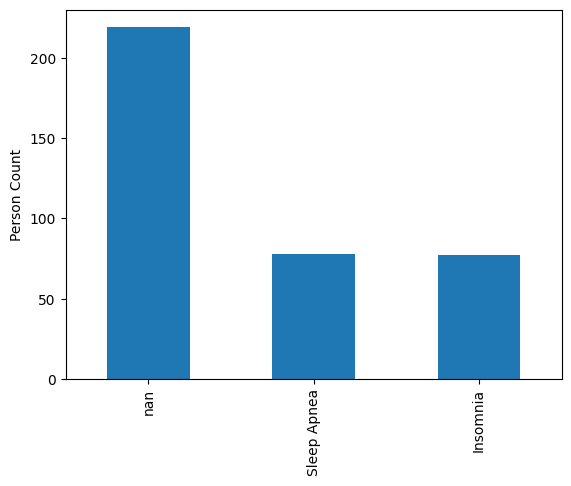

In [4]:
plt = df.Sleep_disorder.value_counts(dropna=False).plot(kind='bar', title='')
plt.set_xlabel('')
plt.set_ylabel('Person Count')

Text(0, 0.5, 'Number of people')

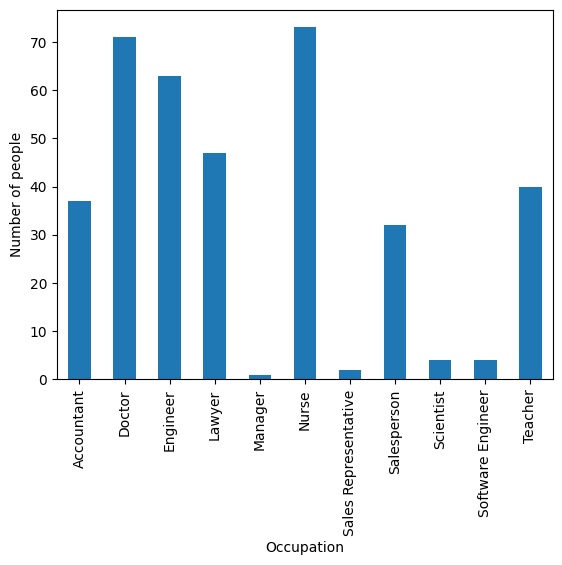

In [5]:
plt = df.Occupation.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('Occupation')
plt.set_ylabel('Number of people') 

Text(0, 0.5, 'Number of people')

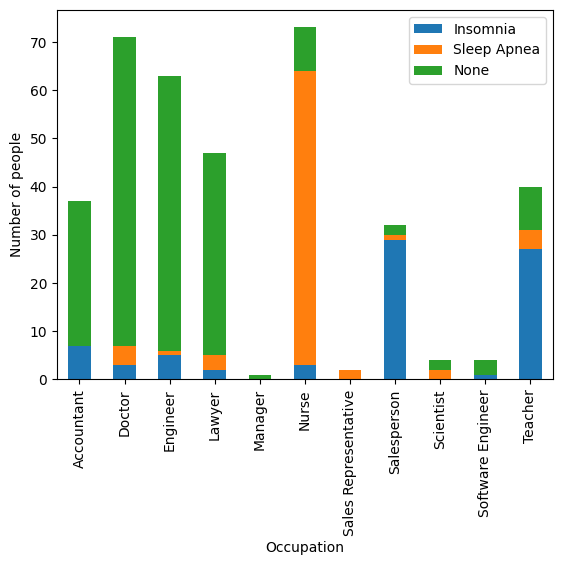

In [6]:
occupation_with_sleep_disorder = df.groupby(['Occupation', 'Sleep_disorder'], dropna=False).Occupation.value_counts().unstack('Sleep_disorder')
plt = occupation_with_sleep_disorder.plot.bar(stacked='True', title='')
plt.legend(['Insomnia','Sleep Apnea','None'])
plt.set_xlabel('Occupation')
plt.set_ylabel('Number of people') 

Text(0, 0.5, 'Number of people')

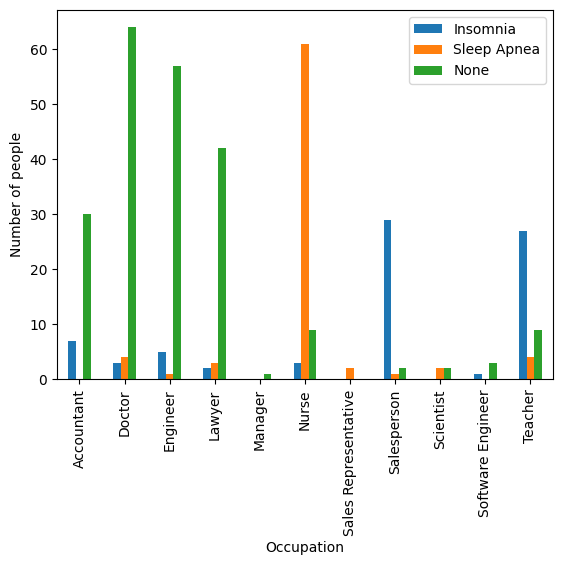

In [7]:
plt = occupation_with_sleep_disorder.plot.bar(title='')
plt.legend(['Insomnia','Sleep Apnea','None'])
plt.set_xlabel('Occupation')
plt.set_ylabel('Number of people') 

# Data preprocessing

## Preprocessing for supervised machine learning 

### Derive binary target attribute (if not already binary)

In [8]:
def map_sleep_disorder(value):
    if value in ["Sleep Apnea", "Insomnia"]:
        return 1
    else:
        return 0
df['Sleep_disorder']=df['Sleep_disorder'].map(map_sleep_disorder)
df

,Person_ID,Gender,Age,Occupation,Sleep_duration,Quality_of_sleep,Activity_level,Stress_level,BMI,Blood_pressure,Heart_rate,Daily_steps,Sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,1
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1


### Train test split 

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

### Feature engineering 

Do at least one additional data preprocessing, such as

-	Remove missing values
-	If the classes are imbalanced, you may upsample (or downsample) the training dataset.
-	Normalize values or use a standard scale 
-	Remove rows based on subsetting
-	Derive new columns
-	Perform feature selection (remove some attributes)


In [10]:
## Převod krevního tlaku na systolický a diastolický
train[['Systol_pressure', 'Diastol_pressure']] = train['Blood_pressure'].str.split('/', expand = True)
train.drop(columns = ['Blood_pressure'], inplace = True)
train

,Person_ID,Gender,Age,Occupation,Sleep_duration,Quality_of_sleep,Activity_level,Stress_level,BMI,Heart_rate,Daily_steps,Sleep_disorder,Systol_pressure,Diastol_pressure
192,193,Male,43,Salesperson,6.5,6,45,7,Overweight,72,6000,1,130,85
75,76,Male,33,Doctor,6.0,6,30,8,Normal,72,5000,0,125,80
84,85,Male,35,Software Engineer,7.5,8,60,5,Normal,70,8000,0,120,80
362,363,Female,59,Nurse,8.2,9,75,3,Overweight,68,7000,1,140,95
16,17,Female,29,Nurse,6.5,5,40,7,Normal,80,4000,1,132,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,Male,33,Doctor,6.1,6,30,8,Normal,72,5000,0,125,80
106,107,Female,37,Nurse,6.1,6,42,6,Overweight,77,4200,0,126,83
270,271,Female,49,Nurse,6.1,6,90,8,Overweight,75,10000,1,140,95
348,349,Female,57,Nurse,8.2,9,75,3,Overweight,68,7000,1,140,95


In [11]:
train = pd.concat([train, pd.get_dummies(train['BMI'], prefix='BMI').astype(int)], axis=1)
train.drop(columns=['BMI'], inplace=True)
train = pd.concat([train, pd.get_dummies(train['Gender'], prefix='Gender').astype(int)], axis=1)
train.drop(columns=['Gender', 'Person_ID'], inplace=True)
train

,Age,Occupation,Sleep_duration,Quality_of_sleep,Activity_level,Stress_level,Heart_rate,Daily_steps,Sleep_disorder,Systol_pressure,Diastol_pressure,BMI_Normal,BMI_Obese,BMI_Overweight,Gender_Female,Gender_Male
192,43,Salesperson,6.5,6,45,7,72,6000,1,130,85,0,0,1,0,1
75,33,Doctor,6.0,6,30,8,72,5000,0,125,80,1,0,0,0,1
84,35,Software Engineer,7.5,8,60,5,70,8000,0,120,80,1,0,0,0,1
362,59,Nurse,8.2,9,75,3,68,7000,1,140,95,0,0,1,1,0
16,29,Nurse,6.5,5,40,7,80,4000,1,132,87,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,33,Doctor,6.1,6,30,8,72,5000,0,125,80,1,0,0,0,1
106,37,Nurse,6.1,6,42,6,77,4200,0,126,83,0,0,1,1,0
270,49,Nurse,6.1,6,90,8,75,10000,1,140,95,0,0,1,1,0
348,57,Nurse,8.2,9,75,3,68,7000,1,140,95,0,0,1,1,0


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['Occupation'] = label_encoder.fit_transform(train['Occupation'])
train

,Age,Occupation,Sleep_duration,Quality_of_sleep,Activity_level,Stress_level,Heart_rate,Daily_steps,Sleep_disorder,Systol_pressure,Diastol_pressure,BMI_Normal,BMI_Obese,BMI_Overweight,Gender_Female,Gender_Male
192,43,7,6.5,6,45,7,72,6000,1,130,85,0,0,1,0,1
75,33,1,6.0,6,30,8,72,5000,0,125,80,1,0,0,0,1
84,35,9,7.5,8,60,5,70,8000,0,120,80,1,0,0,0,1
362,59,5,8.2,9,75,3,68,7000,1,140,95,0,0,1,1,0
16,29,5,6.5,5,40,7,80,4000,1,132,87,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,33,1,6.1,6,30,8,72,5000,0,125,80,1,0,0,0,1
106,37,5,6.1,6,42,6,77,4200,0,126,83,0,0,1,1,0
270,49,5,6.1,6,90,8,75,10000,1,140,95,0,0,1,1,0
348,57,5,8.2,9,75,3,68,7000,1,140,95,0,0,1,1,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[train.columns] = scaler.fit_transform(train[train.columns])
train

,Age,Occupation,Sleep_duration,Quality_of_sleep,Activity_level,Stress_level,Heart_rate,Daily_steps,Sleep_disorder,Systol_pressure,Diastol_pressure,BMI_Normal,BMI_Obese,BMI_Overweight,Gender_Female,Gender_Male
192,0.483871,0.7,0.259259,0.4,0.250000,0.8,0.333333,0.428571,1.0,0.555556,0.50,0.0,0.0,1.0,0.0,1.0
75,0.161290,0.1,0.074074,0.4,0.000000,1.0,0.333333,0.285714,0.0,0.370370,0.25,1.0,0.0,0.0,0.0,1.0
84,0.225806,0.9,0.629630,0.8,0.500000,0.4,0.238095,0.714286,0.0,0.185185,0.25,1.0,0.0,0.0,0.0,1.0
362,1.000000,0.5,0.888889,1.0,0.750000,0.0,0.142857,0.571429,1.0,0.925926,1.00,0.0,0.0,1.0,1.0,0.0
16,0.032258,0.5,0.259259,0.2,0.166667,0.8,0.714286,0.142857,1.0,0.629630,0.60,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.161290,0.1,0.111111,0.4,0.000000,1.0,0.333333,0.285714,0.0,0.370370,0.25,1.0,0.0,0.0,0.0,1.0
106,0.290323,0.5,0.111111,0.4,0.200000,0.6,0.571429,0.171429,0.0,0.407407,0.40,0.0,0.0,1.0,1.0,0.0
270,0.677419,0.5,0.111111,0.4,1.000000,1.0,0.476190,1.000000,1.0,0.925926,1.00,0.0,0.0,1.0,1.0,0.0
348,0.935484,0.5,0.888889,1.0,0.750000,0.0,0.142857,0.571429,1.0,0.925926,1.00,0.0,0.0,1.0,1.0,0.0


Make sure that your preprocessing operation does not use information from the test set. It is therefore recommended to “fit” preprocessing on the training set and then apply it on the test set.

## Applying preprocessing on test data

In [14]:
test[['Systol_pressure', 'Diastol_pressure']] = test['Blood_pressure'].str.split('/', expand = True)
test.drop(columns = ['Blood_pressure'], inplace = True)

test = pd.concat([test, pd.get_dummies(test['BMI'], prefix='BMI').astype(int)], axis=1)
test.drop(columns=['BMI'], inplace=True)
test = pd.concat([test, pd.get_dummies(test['Gender'], prefix='Gender').astype(int)], axis=1)
test.drop(columns=['Gender', 'Person_ID'], inplace=True)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test['Occupation'] = label_encoder.fit_transform(test['Occupation'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test[test.columns] = scaler.fit_transform(test[test.columns])

In [15]:
test

,Age,Occupation,Sleep_duration,Quality_of_sleep,Activity_level,Stress_level,Heart_rate,Daily_steps,Sleep_disorder,Systol_pressure,Diastol_pressure,BMI_Normal,BMI_Obese,BMI_Overweight,Gender_Female,Gender_Male
329,0.81250,0.250,1.000000,1.0,0.00,0.0,0.00,0.285714,0.0,0.4,0.25,1.0,0.0,0.0,1.0,0.0
33,0.12500,0.125,0.076923,0.4,0.00,1.0,0.35,0.285714,0.0,0.4,0.25,1.0,0.0,0.0,0.0,1.0
15,0.06250,0.125,0.038462,0.4,0.00,1.0,0.25,0.714286,0.0,0.2,0.25,1.0,0.0,0.0,0.0,1.0
325,0.81250,0.250,1.000000,1.0,0.00,0.0,0.00,0.285714,0.0,0.4,0.25,1.0,0.0,0.0,1.0,0.0
57,0.15625,0.125,0.038462,0.4,0.00,1.0,0.35,0.285714,0.0,0.4,0.25,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.28125,0.000,0.500000,0.8,0.50,0.2,0.15,0.571429,1.0,0.0,0.00,1.0,0.0,0.0,1.0,0.0
195,0.50000,0.750,0.230769,0.4,0.25,0.8,0.35,0.428571,1.0,0.6,0.50,0.0,0.0,1.0,0.0,1.0
312,0.78125,0.250,0.961538,1.0,0.00,0.0,0.00,0.285714,0.0,0.4,0.25,1.0,0.0,0.0,1.0,0.0
292,0.71875,0.500,0.076923,0.4,1.00,1.0,0.50,1.000000,1.0,1.0,1.00,0.0,0.0,1.0,1.0,0.0


## Modeling

* Train the model on training data, and evaluate the model on test data. 
* Try at least two machine learning classification algorithms. It is recommended to try Decision Trees and Forests. 


In [16]:
X_train = train.drop(columns = ['Sleep_disorder'])
X_test = test.drop(columns = ['Sleep_disorder'])
y_train = train['Sleep_disorder']
y_test = test['Sleep_disorder']
y_train

192    1.0
75     0.0
84     0.0
362    1.0
16     1.0
      ... 
71     0.0
106    0.0
270    1.0
348    1.0
102    0.0
Name: Sleep_disorder, Length: 299, dtype: float64

### Classifier 1 (decision tree)

* Try various combinations of metaparameters (such as tree depth for decision tree) and record the impact on predictive performance. You can use grid search cross-validation for this.
* Once you determine the best values, you can refit the model with the best parameter value on the entire training data.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
dt_classifier = DecisionTreeClassifier()
dt_params = {'max_depth': [3,5,7,9, 11, 13, 15, 17, 19 ],'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5,6,7,8,9,10]}
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
dt_grid_search = GridSearchCV(dt_classifier, dt_params, cv=kf)
dt_grid_search.fit(X_train, y_train)
print(dt_grid_search.best_params_)
best_dt = dt_grid_search.best_estimator_
best_dt

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=3)

In [18]:
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state = 42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_predictions

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1.])

### Classifier 2 (random forest)

* Try various combinations of metaparameters (such as  number of trees in a forest) and record the impact on predictive performance. You can use grid search cross-validation for this.
* Once you determine the best values, you can refit the model with the best parameter value on the entire training data.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
rf_classifier = RandomForestClassifier(random_state=42)
rf_params = {'max_depth': [3,5,7,9],'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5]}
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
rf_grid_search = GridSearchCV(rf_classifier, rf_params, cv=kf)
rf_grid_search.fit(X_train, y_train)
print(rf_grid_search.best_params_)
best_rf = rf_grid_search.best_estimator_
best_rf

In [ ]:
rf_classifier = RandomForestClassifier(max_depth = 5, random_state = 42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

### Classifier 3 (baseline)

* Fit a baseline model, e.g., a model that predicts the most frequent class in the training data

In [ ]:
from sklearn.dummy import DummyClassifier
baseline_classifier = DummyClassifier(strategy="most_frequent")
baseline_classifier.fit(X_train, y_train)

In [ ]:
baseline_predictions = baseline_classifier.predict(X_test)

# Evaluation

### Classifier 1 (decision tree)

* Compute accuracy and F1 score on test data (you can include also other measures)
* Show confusion matrix
* Multiply the predefined costs with the confusion matrix to get the overall cost of the model

In [ ]:
#predefined costs
cost_false_positive = 10
cost_false_negative = 5

In [ ]:
# Výkon modelu
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy_dt = accuracy_score(y_test, dt_predictions)
f1_dt = f1_score(y_test, dt_predictions)
conf_matrix_dt = confusion_matrix(y_test, dt_predictions)
print(dt_predictions)

In [ ]:
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("F1 Score:", f1_dt)
print("\nConfusion Matrix:")
print(conf_matrix_dt)

In [ ]:
overall_cost_dt = (conf_matrix_dt[0, 1] * cost_false_positive) + (conf_matrix_dt[1, 0] * cost_false_negative)

print("Overall Cost of the Model:", overall_cost_dt)

### Classifier 2 (random forest)

* Compute accuracy and F1 score on test data (you can include also other measures)
* Show confusion matrix
* Multiply the predefined costs with the confusion matrix to get the overall cost of the model

In [ ]:
# Výkon modelu
accuracy_rf = accuracy_score(y_test, rf_predictions)
f1_rf = f1_score(y_test, rf_predictions)
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
print(rf_predictions)

In [ ]:
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

In [ ]:
overall_cost_rf = (conf_matrix_rf[0, 1] * cost_false_positive) + (conf_matrix_rf[1, 0] * cost_false_negative)

print("Overall Cost of the Model:", overall_cost_rf)

### Classifier 3 (baseline)

* Compute accuracy and F1 score on test data (you can include also other measures)
* Show confusion matrix
* Multiply the predefined costs with the confusion matrix to get the overall cost of the model

In [ ]:
# Výkon modelu
accuracy_baseline = accuracy_score(y_test, baseline_predictions)
f1_baseline = f1_score(y_test, baseline_predictions)
conf_matrix_baseline = confusion_matrix(y_test, baseline_predictions)
print(baseline_predictions)

In [ ]:
print("\nBaseline Classifier (Most Frequent Class):")
print("Accuracy:", accuracy_baseline)
print("F1 Score:", f1_baseline)
print("\nConfusion Matrix:")
print(conf_matrix_baseline)

In [ ]:
overall_cost_baseline = (conf_matrix_baseline[0, 1] * cost_false_positive) + (conf_matrix_baseline[1, 0] * cost_false_negative)

print("Overall Cost of the Model:", overall_cost_baseline)

### Summary

* Which metric is most suitable for use for the current problem (accuracy, F-measure)?
* Compare the performance metrics for all types of models (e.g,. decision tree and forest). Which model is the best one?
* Combine (multiply) the predefined costs matrix with the values in the confusion matrix for each model. Which model is the best one? 


# Explanation

## Global explanation

### Classifier 1 - decision tree

* Visualize the decision tree

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(18,18))
x=plot_tree(dt_classifier, filled = True)

In [ ]:
attribute_name = X_train.columns[10]

print(f"Nejvýznamnější atribut pro určení cílové proměnné: {attribute_name}")

In [ ]:
attribute_name_x8 = X_train.columns[8]
attribute_name_x9 = X_train.columns[9]

print(f"Druhý nejvýznamnější atribut je: {attribute_name_x8} a {attribute_name_x9}")

In [ ]:
attribute_name_x0 = X_train.columns[0]
attribute_name_x2 = X_train.columns[2]

print(f"Třetí nejvýznamnější atribut je: {attribute_name_x0} a {attribute_name_x2}")

### Classifier 2 - random forest

* Show the feature importance of variables in the forest

In [ ]:
feature_importance = best_rf.feature_importances_
feature_names = X_train.columns
feature_importance_sorted = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

print("Atributy seřazené podle důležitosti vzestupně:")
for feature, importance in feature_importance_sorted:
    print(f"{feature}: {importance}")

## Local explanation

* Show the *instance of interest* - a row in the dataframe

In [ ]:
row_of_interest = df[df['Person_ID'] == 279]

# Vypsání řádku v poli
print(row_of_interest.to_string(index=False))

* Use both models to classify the chosen instance 

In [ ]:
train['Person_ID'] = df['Person_ID']
test['Person_ID'] = df ['Person_ID']
train

In [ ]:
if 279 in train['Person_ID'].values:
    X_selected = train[train['Person_ID'] == 279]
elif 279 in test['Person_ID'].values:
    X_selected = test[test['Person_ID'] == 279]
X_selected.drop(columns = ['Person_ID', 'Sleep_disorder'], inplace = True)
X_selected

In [ ]:
# Klasifikace vybrané instance pomocí Random Forest Classifieru
rf_prediction = rf_classifier.predict(X_selected)
print("Random Forest Classifier prediction:", rf_prediction)

# Klasifikace vybrané instance pomocí Decision Tree Classifieru
dt_prediction = dt_classifier.predict(X_selected)
print("Decision Tree Classifier prediction:", dt_prediction)

* Do both models assign the same class?

In [ ]:
if dt_prediction == rf_prediction:
    print("Both models assign the same class.")
else:
    print("The models don't assign the same class.")

* What is the confidence (probability) of the prediction?

In [ ]:
#What is the confidence (probability) of the prediction?
proba_rf = rf_classifier.predict_proba(X_selected)
print("Confidence of the prediction as Negative Class", proba_rf[0][0])
print("Confidence of the prediction as Positive Class", proba_rf[0][1])

* If you change the value of the attribute of interest in the instance of interest, how does the classification of the instance change?

In [ ]:
X_selected_new = X_selected
X_selected_new.loc[278, 'BMI_Normal'] = 1
X_selected_new.loc[278, 'BMI_Overweight'] = 0
X_selected_new

In [ ]:
rf_prediction_new = rf_classifier.predict(X_selected_new)
print("Random Forest Classifier prediction after changing value:", rf_prediction_new)
dt_prediction_new = dt_classifier.predict(X_selected_new)
print("Decision Tree Classifier prediction after changing value:", dt_prediction_new)

In [ ]:
if dt_prediction == dt_prediction_new:
    print("Decision Tree assigns the same class before and after changes to the value of the attribute of interest.")
else:
    print("Decision Tree assigns different classes before and after changes to the value of the attribute of interest.")

if rf_prediction == rf_prediction_new:
    print("Random Forest assigns the same class before and after changes to the value of the attribute of interest.")
else:
    print("Random Forest assigns different classes before and after changes to the value of the attribute of interest.")

# Conclusion
Summarize the results, answering questions such as:

1.	Which machine learning result has the highest value and is most interesting? 
2.	What setting provided the best result? 
3.	Which attributes are the most important?


# Optional parts

## Evaluation 

## Ablation study
* Classification: Quantify the effect of individual preprocessing steps (such as rescaling). How would the performance change if you have not performed this step.
* Clustering: Try clustering with and without feature selection in the data preprocessing stage. Compare the results. What would be the impact on the result based on the Rand Index?

###  Optimization of threshold (optional)

* If you would change the probability (score) threshold for classification, would you obtain better results in terms of total costs? For which threshold? 

## Explanation

*	Apply ICE/IME/SHAPLEY/Anchors to explain the classification of the instance

# Final checklist

-	Are all preprocessing steps justified?
-	Did you try different metaparameter values where appropriate?
-	Are the results replicable? If you have the same data, does the report describe all steps in sufficient detail to obtain the same results as reported by the authors?
-	Were proper evaluation metrics selected? Are the results correctly interpreted?
-	Are all important steps explained and justified?
-	What is the quality of writing? Is the language clear and concise?


# Submission

* This .ipynb file with your code + its html version after the code was run (File-Save and export notebook as - html)
* Source data or a link to source data or source data being loaded from a url in the notebook
* Data files after preprorcessing (train.csv and test.csv)